In [96]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [97]:
data.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [98]:
data.shape

(541909, 8)

In [99]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


RE-FORMAT TIMESTAMP

In [100]:
import dateutil
from datetime import datetime as date
from pytz import utc

In [101]:
data['datetime'] = data['InvoiceDate'].apply(lambda x:dateutil.parser.parse(x).timestamp()) # mengubah kolom invoiceDate dari string tanggal ke objek datetime, kemudian konversi objek datetime menjadi timestamp
data['month'] = data['datetime'].apply(lambda x: date.fromtimestamp(x, utc).month) # mengubah kolom datetime dari bentuk timestamp kembali menjadi objek date berdasarkan utc, dan diambil informasi bulan nya
data['year'] = data['datetime'].apply(lambda x: date.fromtimestamp(x, utc).year) # mengubah kolom datetime dari bentuk timestamp kembali menjadi objek date berdasarkan utc, dan diambil informasi tahun nya

In [102]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.291167e+09,12,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1.291167e+09,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,2010


-----

MEMBUAT COHORT

In [103]:
data['cohort'] = data.apply(lambda row: (row['year'] * 100) + (row['month']), axis=1) # misalnya DEC 2010, maka cohortnya menjadi 201012
cohorts = data.groupby('CustomerID')['cohort'].min().reset_index() # mengelompokkan customer berdasarkan dari cohort yang paling kecil (bulan paling awal)
cohorts.columns = ['CustomerID', 'first_cohort']
data = data.merge(cohorts, on='CustomerID', how='left')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,year,cohort,first_cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1.291167e+09,12,2010,201012,201012.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,2010,201012,201012.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1.291167e+09,12,2010,201012,201012.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,2010,201012,201012.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1.291167e+09,12,2010,201012,201012.0


-----

HEADER COHORT

In [104]:
headers = data['cohort'].value_counts().reset_index()
headers.columns = ['Cohorts', 'Count']
headers = headers.sort_values(['Cohorts']) ['Cohorts'].to_list()
headers

[201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112]

PIVOT DATA COHORT

In [105]:
data.dropna(inplace=True)

In [106]:
data['cohort_distance'] = data.apply(lambda row: (headers.index(row['cohort']) - headers.index(row['first_cohort'])) if row['first_cohort'] else None, axis=1)
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,month,year,cohort,first_cohort,cohort_distance
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,1.323410e+09,12,2011,201112,201108.0,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,1.323410e+09,12,2011,201112,201108.0,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,1.323410e+09,12,2011,201112,201108.0,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,1.323410e+09,12,2011,201112,201108.0,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,1.323410e+09,12,2011,201112,201108.0,4


untuk menambahkan kolom baru dengan nama 'cohort_distance', di mana dihitung dengan mengurangi tanggal cohort dengan tanggal first cohort

In [107]:
cohort_pivot = pd.pivot_table(data, index='first_cohort', columns='cohort_distance', values ='CustomerID', aggfunc = pd.Series.nunique) 
# setiap baris dalam pivot table akan mewakili kelompok pelanggan berdasarkan first cohort
# setiap kolom dalam pivot table akan mewakili cohort distance nya (jarak first cohort ke cohort terbaru)
# nilai dalam pivot table akan diambil dari kolom CustomerID
# aggfunc digunakan untuk menghitung nilai unik dalam kolom CustomerID 
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
first_cohort,,,,,,,,,,,,,
201012.0,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
201101.0,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
201102.0,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
201103.0,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
201104.0,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
201105.0,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
201106.0,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
201107.0,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108.0,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dapat dilihat bagaimana kelompok pelanggan tertentu (berdasarkan first cohort) berkembang seiring waktu, misalnya dilihat dari berapa banyak pelanggan yang melakukan re-purchase pada bulan-bulan berikutnya setelah first cohort.

* untuk kelompok pelanggan dengan first cohort pada bulan DEC 2010, terlihat bahwa terdapat 948 orang pelanggan. 1 bulan kemudian, tersisa 362 pelanggan dari 948 pelanggan, dan seterusnya. menunjukkan bahwa pada kelompok pelanggan ini mengalami naik-turun pada tiap bulannya.

In [108]:
cohort_pivot = cohort_pivot.div(cohort_pivot[0], axis=0) # dilakukan normalisasi nilai pada setiap kolom menggunakan nilai pada kolom pertama (index 0) sebagai pembagi
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
first_cohort,,,,,,,,,,,,,
201012.0,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
201101.0,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
201102.0,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
201103.0,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
201104.0,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
201105.0,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
201106.0,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
201107.0,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201108.0,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


tujuannya untuk memperoleh nilai persentase (%) dari jumlah pelanggan yang masih aktif terhadap jumlah pelanggan yang bergabung pada periode awal.
* misalnya untuk kelompok pelanggan dengan first cohort pada bulan DEC 2010, 1 bulan kemudian hanya menyisakan sekitar 38% dari total pelanggan awal.

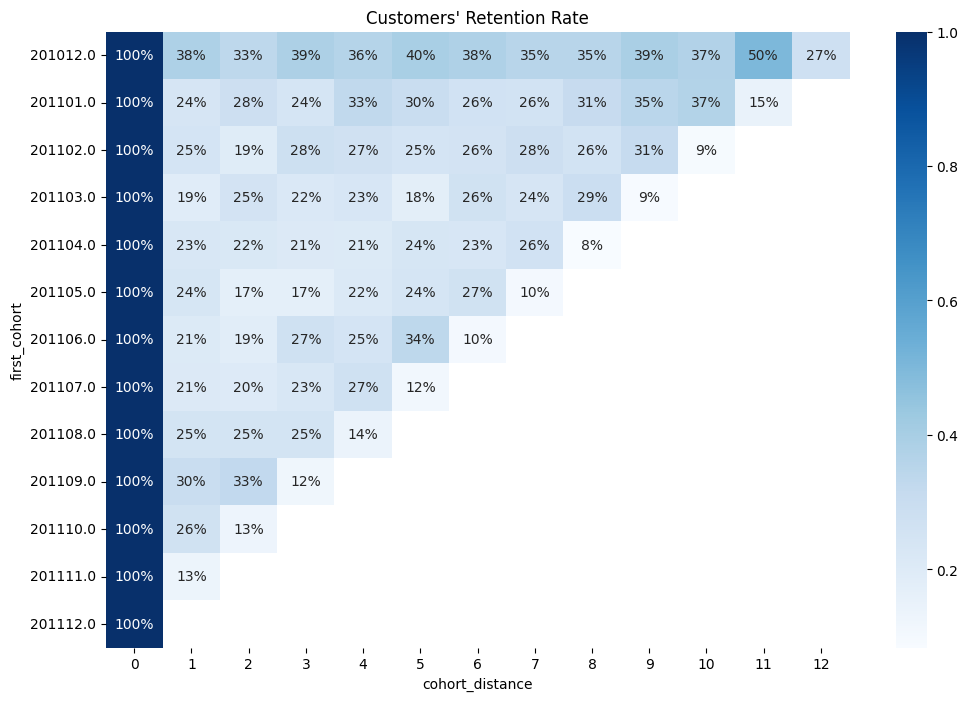

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.title("Customers' Retention Rate")
sns.heatmap(cohort_pivot, annot=True, cmap='Blues', fmt='.0%')
plt.show()